In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [45]:
dataset = pd.read_csv('LungCap.csv')

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LungCap(cc)     725 non-null    float64
 1   Age( years)     725 non-null    int64  
 2   Height(inches)  725 non-null    float64
 3   Smoke           725 non-null    object 
 4   Gender          725 non-null    object 
 5   Caesarean       725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [47]:
dataset = dataset.rename({'LungCap(cc)': 'LungCap', 'Age( years)': 'Age', 'Height(inches)': 'Height'}, axis=1)

# Study on the dataset

In [48]:
dataset.describe()

,LungCap,Age,Height
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


<AxesSubplot:ylabel='Smoke'>

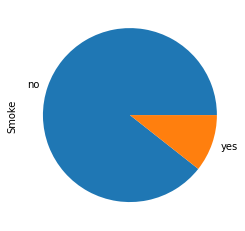

In [49]:
dataset['Smoke'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Gender'>

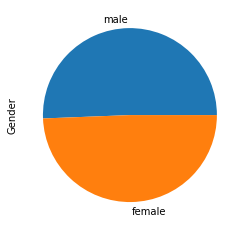

In [50]:
dataset['Gender'].value_counts().plot(kind='pie')

In [51]:
dataset.dtypes

LungCap      float64
Age            int64
Height       float64
Smoke         object
Gender        object
Caesarean     object
dtype: object

In [52]:
dataset.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

array([[<AxesSubplot:title={'center':'LungCap'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>, <AxesSubplot:>]],
      dtype=object)

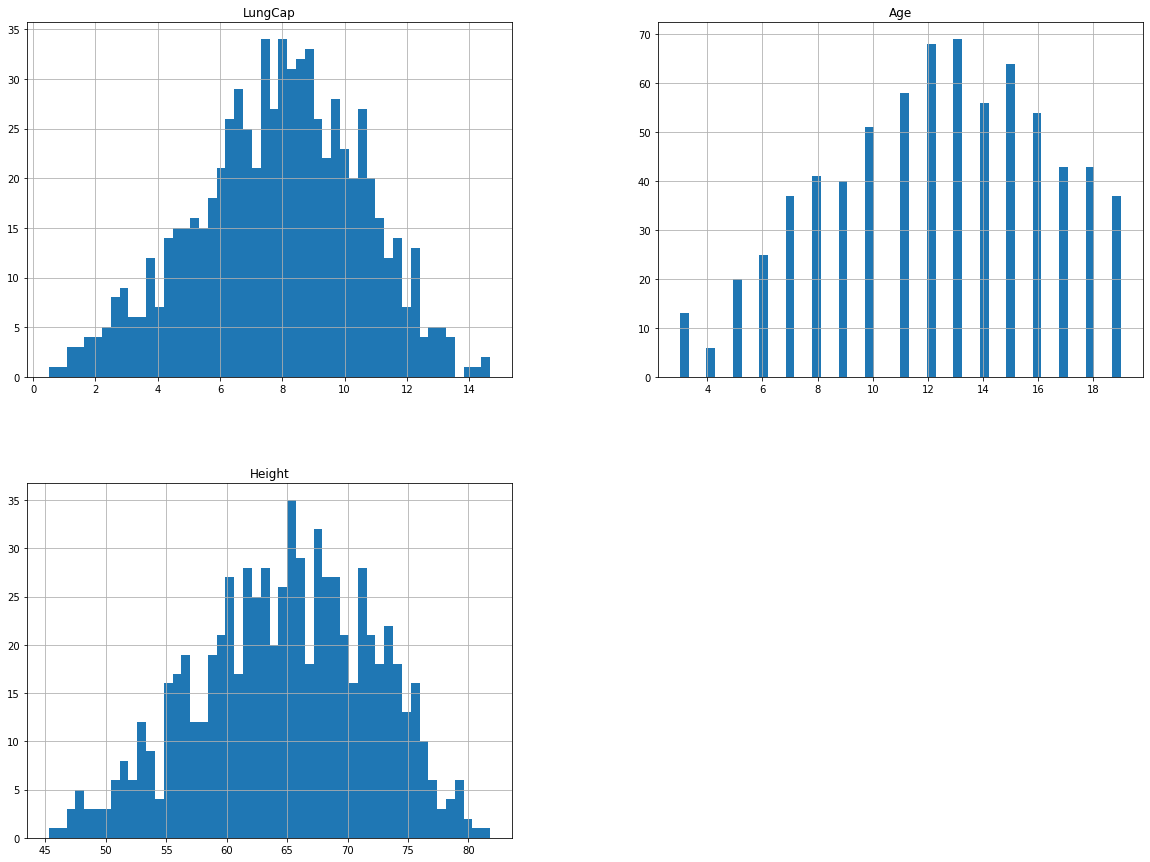

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(20,15))

# Converting Non-Numerical values (Object data type) to numerical values

In [54]:
cat_variables = dataset[["Smoke", "Gender","Caesarean"]]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,Smoke_yes,Gender_male,Caesarean_yes
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0


In [55]:
dataset_df = dataset.drop(["Smoke", "Gender","Caesarean"], axis=1)
dataset_df = pd.concat([dataset_df, cat_dummies], axis=1)
dataset_df.head()

,LungCap,Age,Height,Smoke_yes,Gender_male,Caesarean_yes
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


# Splitting the Dataset into Test and Train

In [56]:
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


train_valid,df_test = mydf_splitter(dataset_df,510)

print(train_valid.shape,df_test.shape)

(510, 6) (215, 6)


<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

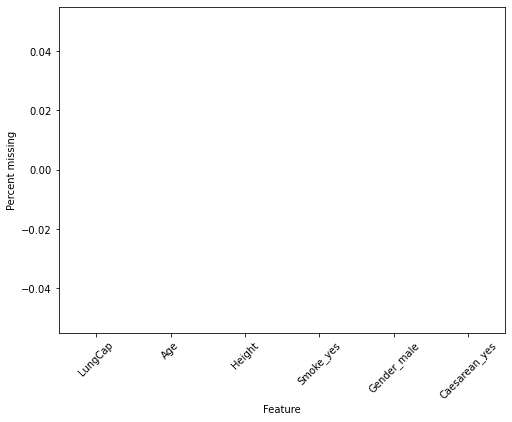

In [57]:
#Checking null values through visualization
null_vals = train_valid.isnull().sum()/len(train_valid)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [58]:
#There are no null values

In [59]:
train_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LungCap        510 non-null    float64
 1   Age            510 non-null    int64  
 2   Height         510 non-null    float64
 3   Smoke_yes      510 non-null    uint8  
 4   Gender_male    510 non-null    uint8  
 5   Caesarean_yes  510 non-null    uint8  
dtypes: float64(2), int64(1), uint8(3)
memory usage: 13.6 KB


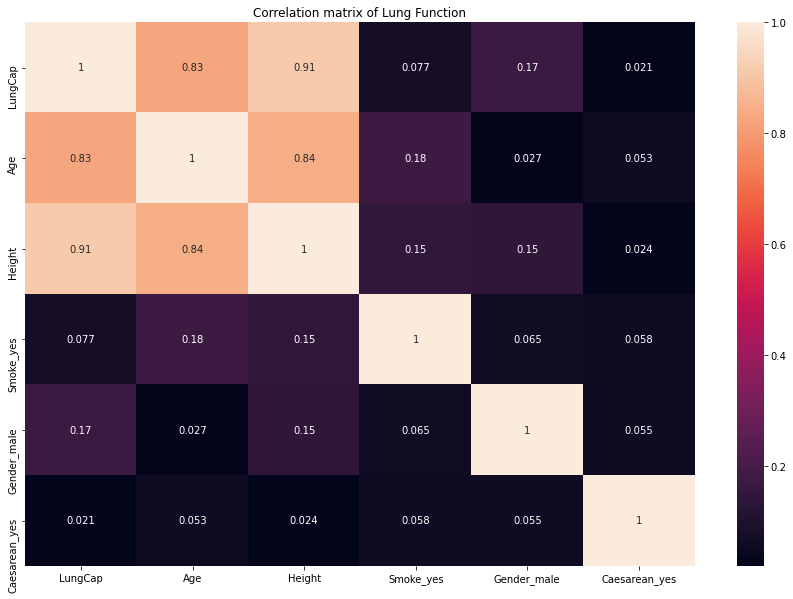

In [60]:
#Correlation Matrix
plt.figure(figsize=(15,10))
plt.title("Correlation matrix of Lung Function")
sns.heatmap(train_valid.corr().abs(), annot=True)
plt.show()

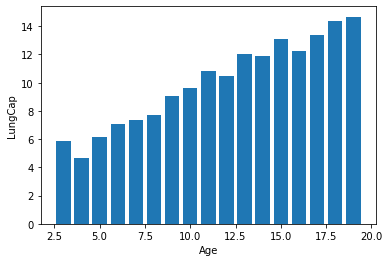

In [61]:
# train_data.plot.bar()
  
# plot between 2 attributes
plt.bar(train_valid['Age'], train_valid['LungCap'])
plt.xlabel("Age")
plt.ylabel("LungCap")
plt.show()

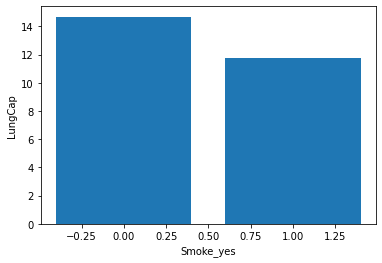

In [62]:
plt.bar(train_valid['Smoke_yes'], train_valid['LungCap'])
plt.xlabel("Smoke_yes")
plt.ylabel("LungCap")
plt.show()

In [63]:
#Splitting data to get the target coloumn
train_valid_x = train_valid.drop('LungCap', axis=1)
train_valid_y = train_valid['LungCap']
test_data_x = df_test.drop('LungCap', axis=1)
test_data_y = df_test['LungCap']
print(train_valid_x.shape)
print(train_valid_y.shape)
print(test_data_x.shape)
print(test_data_y.shape)

(510, 5)
(510,)
(215, 5)
(215,)


# Scaling the dataset

In [64]:
scaler = StandardScaler()
scaler.fit(train_valid_x)
print(scaler.mean_)

[12.40196078 64.99960784  0.1         0.52941176  0.22156863]


In [65]:
test_data =scaler.transform(test_data_x)
test_data_x

,Age,Height,Smoke_yes,Gender_male,Caesarean_yes
510,11,72.1,0,0,1
511,12,63.9,1,0,0
512,18,76.3,1,0,0
513,3,51.9,0,1,0
514,14,60.2,1,0,0
...,...,...,...,...,...
720,9,56.0,0,0,0
721,18,72.0,1,1,1
722,11,60.5,1,0,0
723,15,64.9,0,0,0


# Random Forest Regressor

In [66]:
#Fitting the model to the training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(train_valid_x, train_valid_y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [67]:
#Predicting using the test set
y_pred = regressor.predict(test_data_x)

In [68]:
#Checking the predicted values vs Real Values
df = pd.DataFrame({'Real Values':test_data_y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
510,9.025,9.452500
511,6.700,6.970000
512,11.500,11.885000
513,1.675,1.340000
514,6.225,7.047500
...,...,...
720,5.725,4.405625
721,9.050,10.285000
722,3.850,6.215000
723,9.825,9.135000


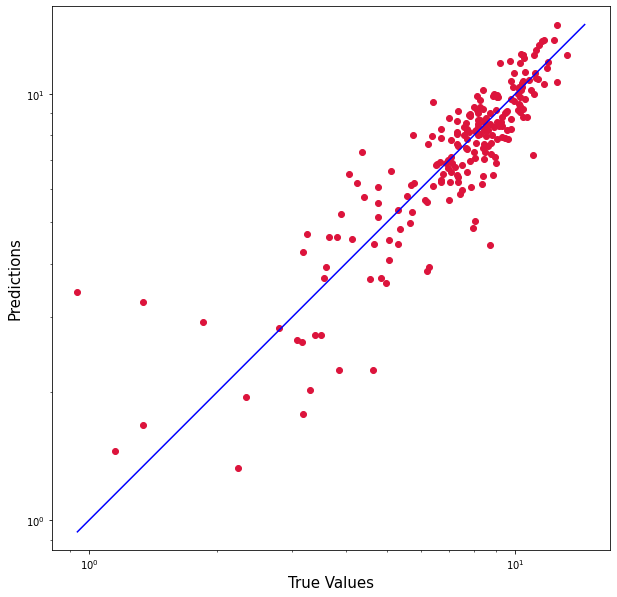

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, test_data_y, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(test_data_y), max(y_pred))
p2 = min(min(test_data_y), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [70]:
# from sklearn.linear_model import SGDRegressor

# model1 = SGDRegressor(max_iter=1000, tol=1e-3)

# # fit model
# model1.fit(train_valid_x, train_valid_y)

# # predict probabilities
# pred_prob1 = model1.predict(test_data_x)

In [71]:
# Function to calculate MSE RMSE MAE
def accuracy_metrics(model_name, test_data_y, y_pred):
    from sklearn import metrics
    print(model_name)
    # print('-'*len(model_name))
    ## RMSE - Root Mean Squared Errors
    ## MSE - Mean Squared Errors
    ## MAE - Mean Absolute Error
    print (f'Mean Absolute Error (MAE): {metrics.mean_absolute_error(test_data_y,y_pred)}')
    print(f'Mean Squared Error (MSE) : {metrics.mean_squared_error(test_data_y,y_pred)}')
    print(f'Root Mean Squared Error (RMSE) : {np.sqrt(metrics.mean_squared_error(test_data_y,y_pred))}')


In [72]:
accuracy_metrics('Random Forest Regressor', test_data_y, y_pred)

Random Forest Regressor
Mean Absolute Error (MAE): 0.9773252048726467
Mean Squared Error (MSE) : 1.5185236559058035
Root Mean Squared Error (RMSE) : 1.2322839185454801


# XGB Regressor and Other Regressor

In [73]:
from sklearn.svm import SVR
import sklearn.linear_model as linear_model
import xgboost as xg

classifiers = [
    SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123),
    linear_model.LinearRegression()]

for classifier in classifiers:
    print('----------------')
    clf = classifier
    clf.fit(train_valid_x, train_valid_y)
    y_hat = clf.predict(test_data_x)
    accuracy_metrics(classifier,test_data_y, y_hat)

----------------
SVR()
Mean Absolute Error (MAE): 0.8692005707320092
Mean Squared Error (MSE) : 1.2260693896179653
Root Mean Squared Error (RMSE) : 1.1072801766571843
----------------
SGDRegressor()
Mean Absolute Error (MAE): 1339542743084.9902
Mean Squared Error (MSE) : 1.807473408249565e+24
Root Mean Squared Error (RMSE) : 1344423076360.1035
----------------
BayesianRidge()
Mean Absolute Error (MAE): 0.8364872038634292
Mean Squared Error (MSE) : 1.0719131994884037
Root Mean Squared Error (RMSE) : 1.0353324101410153
----------------
LassoLars()
Mean Absolute Error (MAE): 2.060273761969904
Mean Squared Error (MSE) : 7.051779192844611
Root Mean Squared Error (RMSE) : 2.655518629730285
----------------
ARDRegression()
Mean Absolute Error (MAE): 0.8350599865493541
Mean Squared Error (MSE) : 1.068328831681766
Root Mean Squared Error (RMSE) : 1.033599937926549
----------------
PassiveAggressiveRegressor()
Mean Absolute Error (MAE): 1.236989097986395
Mean Squared Error (MSE) : 2.330547858778

In [74]:
train_valid_x.describe()

,Age,Height,Smoke_yes,Gender_male,Caesarean_yes
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,12.401961,64.999608,0.100000,0.529412,0.221569
std,3.998673,7.321921,0.300295,0.499624,0.415710
min,3.000000,46.600000,0.000000,0.000000,0.000000
25%,10.000000,59.725000,0.000000,0.000000,0.000000
50%,13.000000,65.400000,0.000000,1.000000,0.000000
75%,16.000000,70.500000,0.000000,1.000000,0.000000
max,19.000000,81.800000,1.000000,1.000000,1.000000


# DNN using TensorFlow

In [75]:
import tensorflow as tf

print(tf.__version__)

2.4.1


In [76]:
import tensorflow
import keras
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm
from keras import regularizers

In [77]:
#Creating the DNN model
model = Sequential()
model.add(Dropout(0.4, input_shape=(5,)))
model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(24,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 24)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [78]:
#Fitting and prediction using the model
from keras.optimizers import SGD
# tf.keras.backend.clear_session()
opt = keras.optimizers.Adam(learning_rate=0.1)
# opt = SGD(lr=0.01, momentum=0.8)
model.compile(loss='mse', optimizer=opt, metrics=['mse','mean_absolute_error'])
history=model.fit(train_valid_x, train_valid_y, epochs=400, batch_size=32, verbose=1, validation_split=0.2)
predictions = model.predict(test_data_x)

Epoch 1/400
13/13 [==============================] - 1s 17ms/step - loss: 43.7215 - mse: 43.5865 - mean_absolute_error: 5.7417 - val_loss: 13.8907 - val_mse: 13.6780 - val_mean_absolute_error: 3.1495
Epoch 2/400
13/13 [==============================] - 0s 7ms/step - loss: 10.3280 - mse: 10.0987 - mean_absolute_error: 2.6255 - val_loss: 8.1134 - val_mse: 7.8477 - val_mean_absolute_error: 2.2650
Epoch 3/400
13/13 [==============================] - 0s 8ms/step - loss: 7.4589 - mse: 7.1974 - mean_absolute_error: 2.1905 - val_loss: 8.2095 - val_mse: 7.9441 - val_mean_absolute_error: 2.2575
Epoch 4/400
13/13 [==============================] - 0s 8ms/step - loss: 7.6172 - mse: 7.3565 - mean_absolute_error: 2.1736 - val_loss: 9.5219 - val_mse: 9.2602 - val_mean_absolute_error: 2.3651
Epoch 5/400
13/13 [==============================] - 0s 8ms/step - loss: 7.6886 - mse: 7.4358 - mean_absolute_error: 2.1997 - val_loss: 8.1934 - val_mse: 7.9516 - val_mean_absolute_error: 2.2577
Epoch 6/400
13/13 

Epoch 43/400
13/13 [==============================] - 0s 4ms/step - loss: 6.6948 - mse: 6.6548 - mean_absolute_error: 2.1056 - val_loss: 8.0040 - val_mse: 7.9567 - val_mean_absolute_error: 2.3294
Epoch 44/400
13/13 [==============================] - 0s 4ms/step - loss: 7.5237 - mse: 7.4751 - mean_absolute_error: 2.2125 - val_loss: 7.9279 - val_mse: 7.8807 - val_mean_absolute_error: 2.3005
Epoch 45/400
13/13 [==============================] - 0s 4ms/step - loss: 6.9485 - mse: 6.9018 - mean_absolute_error: 2.1618 - val_loss: 8.1734 - val_mse: 8.1271 - val_mean_absolute_error: 2.3794
Epoch 46/400
13/13 [==============================] - 0s 4ms/step - loss: 7.3379 - mse: 7.2939 - mean_absolute_error: 2.2086 - val_loss: 7.9131 - val_mse: 7.8645 - val_mean_absolute_error: 2.2933
Epoch 47/400
13/13 [==============================] - 0s 4ms/step - loss: 7.7704 - mse: 7.7240 - mean_absolute_error: 2.2632 - val_loss: 8.2715 - val_mse: 8.2223 - val_mean_absolute_error: 2.2733
Epoch 48/400
13/13 [

Epoch 85/400
13/13 [==============================] - 0s 5ms/step - loss: 6.9488 - mse: 6.9322 - mean_absolute_error: 2.1348 - val_loss: 8.0101 - val_mse: 7.9958 - val_mean_absolute_error: 2.3416
Epoch 86/400
13/13 [==============================] - 0s 7ms/step - loss: 7.1362 - mse: 7.1219 - mean_absolute_error: 2.1476 - val_loss: 7.8672 - val_mse: 7.8515 - val_mean_absolute_error: 2.2640
Epoch 87/400
13/13 [==============================] - 0s 8ms/step - loss: 6.8024 - mse: 6.7874 - mean_absolute_error: 2.1110 - val_loss: 8.0534 - val_mse: 8.0390 - val_mean_absolute_error: 2.3551
Epoch 88/400
13/13 [==============================] - 0s 8ms/step - loss: 7.2813 - mse: 7.2665 - mean_absolute_error: 2.2438 - val_loss: 7.8968 - val_mse: 7.8828 - val_mean_absolute_error: 2.3014
Epoch 89/400
13/13 [==============================] - 0s 6ms/step - loss: 6.6242 - mse: 6.6098 - mean_absolute_error: 2.1070 - val_loss: 8.1992 - val_mse: 8.1870 - val_mean_absolute_error: 2.3940
Epoch 90/400
13/13 [

Epoch 127/400
13/13 [==============================] - 0s 9ms/step - loss: 7.1203 - mse: 7.1172 - mean_absolute_error: 2.2086 - val_loss: 7.9738 - val_mse: 7.9710 - val_mean_absolute_error: 2.3340
Epoch 128/400
13/13 [==============================] - 0s 12ms/step - loss: 6.5356 - mse: 6.5327 - mean_absolute_error: 2.0872 - val_loss: 7.9168 - val_mse: 7.9144 - val_mean_absolute_error: 2.3142
Epoch 129/400
13/13 [==============================] - 0s 8ms/step - loss: 7.0454 - mse: 7.0430 - mean_absolute_error: 2.1791 - val_loss: 7.9550 - val_mse: 7.9526 - val_mean_absolute_error: 2.3280
Epoch 130/400
13/13 [==============================] - 0s 6ms/step - loss: 6.6370 - mse: 6.6345 - mean_absolute_error: 2.0609 - val_loss: 8.1787 - val_mse: 8.1754 - val_mean_absolute_error: 2.3913
Epoch 131/400
13/13 [==============================] - 0s 5ms/step - loss: 7.6036 - mse: 7.5998 - mean_absolute_error: 2.2556 - val_loss: 7.9442 - val_mse: 7.9400 - val_mean_absolute_error: 2.3235
Epoch 132/400


Epoch 210/400
13/13 [==============================] - 0s 6ms/step - loss: 7.3183 - mse: 7.3105 - mean_absolute_error: 2.2228 - val_loss: 7.9232 - val_mse: 7.9159 - val_mean_absolute_error: 2.3147
Epoch 211/400
13/13 [==============================] - 0s 5ms/step - loss: 6.9032 - mse: 6.8960 - mean_absolute_error: 2.1715 - val_loss: 7.9190 - val_mse: 7.9125 - val_mean_absolute_error: 2.3134
Epoch 212/400
13/13 [==============================] - 0s 6ms/step - loss: 6.4772 - mse: 6.4708 - mean_absolute_error: 2.0691 - val_loss: 7.8545 - val_mse: 7.8488 - val_mean_absolute_error: 2.2852
Epoch 213/400
13/13 [==============================] - 0s 4ms/step - loss: 7.4154 - mse: 7.4096 - mean_absolute_error: 2.1818 - val_loss: 7.9605 - val_mse: 7.9543 - val_mean_absolute_error: 2.3285
Epoch 214/400
13/13 [==============================] - 0s 4ms/step - loss: 6.5753 - mse: 6.5690 - mean_absolute_error: 2.0737 - val_loss: 7.8768 - val_mse: 7.8706 - val_mean_absolute_error: 2.2960
Epoch 215/400
1

Epoch 293/400
13/13 [==============================] - 0s 4ms/step - loss: 7.1287 - mse: 7.1251 - mean_absolute_error: 2.1818 - val_loss: 7.8801 - val_mse: 7.8770 - val_mean_absolute_error: 2.2989
Epoch 294/400
13/13 [==============================] - 0s 4ms/step - loss: 7.2426 - mse: 7.2396 - mean_absolute_error: 2.1818 - val_loss: 7.8408 - val_mse: 7.8389 - val_mean_absolute_error: 2.2785
Epoch 295/400
13/13 [==============================] - 0s 4ms/step - loss: 7.3278 - mse: 7.3254 - mean_absolute_error: 2.2108 - val_loss: 8.0461 - val_mse: 8.0417 - val_mean_absolute_error: 2.3559
Epoch 296/400
13/13 [==============================] - 0s 4ms/step - loss: 6.9397 - mse: 6.9342 - mean_absolute_error: 2.1643 - val_loss: 7.9534 - val_mse: 7.9454 - val_mean_absolute_error: 2.3254
Epoch 297/400
13/13 [==============================] - 0s 6ms/step - loss: 6.7207 - mse: 6.7126 - mean_absolute_error: 2.1412 - val_loss: 7.8486 - val_mse: 7.8406 - val_mean_absolute_error: 2.2800
Epoch 298/400
1

Epoch 376/400
13/13 [==============================] - 0s 6ms/step - loss: 7.1378 - mse: 7.1377 - mean_absolute_error: 2.1520 - val_loss: 7.9123 - val_mse: 7.9122 - val_mean_absolute_error: 2.3133
Epoch 377/400
13/13 [==============================] - 0s 5ms/step - loss: 6.5904 - mse: 6.5903 - mean_absolute_error: 2.0820 - val_loss: 7.8553 - val_mse: 7.8552 - val_mean_absolute_error: 2.2887
Epoch 378/400
13/13 [==============================] - 0s 5ms/step - loss: 6.5813 - mse: 6.5812 - mean_absolute_error: 2.0888 - val_loss: 7.8840 - val_mse: 7.8840 - val_mean_absolute_error: 2.3019
Epoch 379/400
13/13 [==============================] - 0s 5ms/step - loss: 7.1895 - mse: 7.1895 - mean_absolute_error: 2.2147 - val_loss: 7.9313 - val_mse: 7.9313 - val_mean_absolute_error: 2.3203
Epoch 380/400
13/13 [==============================] - 0s 6ms/step - loss: 7.0147 - mse: 7.0147 - mean_absolute_error: 2.1794 - val_loss: 7.8459 - val_mse: 7.8458 - val_mean_absolute_error: 2.2835
Epoch 381/400
1

In [79]:
accuracy_metrics(model, test_data_y, predictions)

Mean Absolute Error (MAE): 2.06260683370191
Mean Squared Error (MSE) : 7.008077054103796
Root Mean Squared Error (RMSE) : 2.647277290746815


dict_keys(['loss', 'mse', 'mean_absolute_error', 'val_loss', 'val_mse', 'val_mean_absolute_error'])


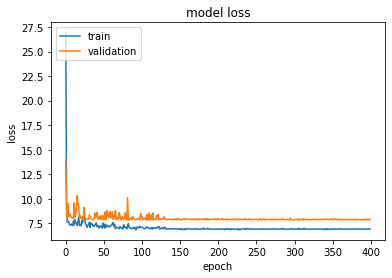

In [80]:
#Train vs Validation graph for loss value
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [81]:
train_valid_x.shape[1]

5

In [82]:
rms_vals = [np.sqrt(np.sum(np.square(train_valid_x.iloc[i,:]))/train_valid_x.shape[1]) for i in range(len(train_valid_x))]

In [83]:
#RMS values for the epochs
rms_vals

[27.904874126216733,
 34.36594244306418,
 31.984652569630956,
 32.36664950222682,
 25.548424608965618,
 26.708388195471475,
 28.54081288260725,
 31.86898178480135,
 32.23740063962974,
 26.931914154029233,
 35.21352013076796,
 32.95721468813771,
 26.272609310839304,
 27.688300778487655,
 27.736041534436744,
 28.99396488926618,
 27.31534367347407,
 25.34643959217941,
 27.811652234270444,
 32.18807232500883,
 25.769322847137445,
 26.937297563044442,
 33.16250895212846,
 30.812335192257013,
 29.790904652259222,
 27.941689283219795,
 27.67124861656951,
 29.615401398596642,
 21.852642860761716,
 33.19337283253993,
 24.081901918245578,
 29.51640221978282,
 31.535662352327403,
 29.914411242743856,
 30.795584099023024,
 29.635283025474887,
 23.724628553467387,
 28.72963626640616,
 29.305835596344966,
 35.5732764867112,
 29.910399529260726,
 33.30540496676178,
 26.582738760330923,
 30.75155280632183,
 22.214814876563793,
 28.42449647751038,
 28.03529917800058,
 29.428183769984855,
 34.3511571857

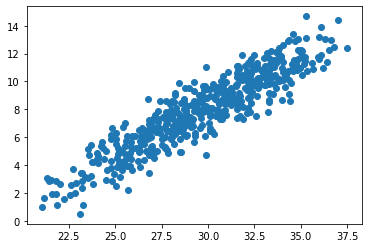

In [84]:
plt.scatter(rms_vals, train_valid_y)
## Linearly separable data points.